In [9]:
# problem1
# dp 사용

import numpy as np
from PIL import Image

def solution1(image):
    if len(image.shape)==3:
        height, width, _ = image.shape
    else:
        height, width = image.shape
    integral_image = np.zeros(image.shape).astype('float32')
    integral_image[0,0] = image[0,0]
    for i in range(1, height):
        integral_image[i,0] = integral_image[i-1,0]+image[i,0]
    for i in range(1, width):
        integral_image[0,i] = integral_image[0,i-1]+image[0,i]
    for i in range(1,height):
        for j in range(1,width):
            integral_image[i,j] = integral_image[i-1,j]+integral_image[i,j-1]-integral_image[i-1,j-1]+image[i,j]
            
    return integral_image
    

path = 'test1.jpg'
img = np.array(Image.open(path)).astype('float32')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
result = solution1(img)

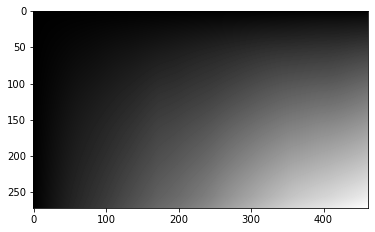

In [10]:
plt.imshow(result, cmap='gray')

In [11]:
import numpy as np
from PIL import Image
import cv2

def solution2(image):
    # 8x8 필터라 가정
    
    def filter1(iimg, i,j):
        e1 =iimg[i,j]-iimg[i+8,j]-iimg[i,j+4]+iimg[i+8,j+4]
        e2 =iimg[i,j+4]-iimg[i+8,j+4]-iimg[i,j+8]+iimg[i+8,j+8]
        return e1-e2
        
    def filter2(iimg, i,j):
        e1 =iimg[i,j]-iimg[i+4,j]-iimg[i,j+8]+iimg[i+4,j+8]
        e2 =iimg[i+4,j]-iimg[i+8,j]-iimg[i+4,j+8]+iimg[i+8,j+8]
        return e1-e2
        
    def filter3(iimg, i,j):
        e1 =iimg[i,j]-iimg[i+4,j]-iimg[i,j+4]+iimg[i+4,j+4]
        e2 =iimg[i,j+4]-iimg[i,j+8]-iimg[i+4,j+4]+iimg[i+4,j+8]
        e3 =iimg[i+4,j]-iimg[i+8,j]-iimg[i+4,j+4]+iimg[i+8,j+4]
        e4 =iimg[i+4,j+4]-iimg[i+8,j+4]-iimg[i+4,j+8]+iimg[i+8,j+8]
        return e1-e2-e3+e4
        
    def filter4(iimg, i,j):
        e1 =iimg[i,j]-iimg[i+8,j]-iimg[i,j+2]+iimg[i+8,j+2]
        e2 =iimg[i,j+2]-iimg[i+8,j+2]-iimg[i,j+6]+iimg[i+8,j+6]
        e3 =iimg[i,j+6]-iimg[i+8,j+6]-iimg[i,j+8]+iimg[i+8,j+8]
        return e1-e2-e2+e3
    
    
    if len(image.shape)==3:
        height, width, _ = image.shape
    else:
        height, width = image.shape
    result1=np.zeros(image.shape)
    result2=np.zeros(image.shape)
    result3=np.zeros(image.shape)
    result4=np.zeros(image.shape)
    if len(image.shape)==3:
        image = np.pad(image, ((4,4),(4,4),(0,0)), 'constant', constant_values=0)
    else:
        image = np.pad(image, ((4,4),(4,4)), 'constant', constant_values=0)
    
    
    for i in range(height):
        for j in range(width):
            result1[i,j] = filter1(image,i,j)
            result2[i,j] = filter2(image,i,j)
            result3[i,j] = filter3(image,i,j)
            result4[i,j] = filter4(image,i,j)
    return result1, result2, result3, result4

path = 'test.jpg'
img = np.array(Image.open(path)).astype('float32')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
iimg = solution1(img)


results = list(solution2(iimg))

for result in results:
    cv2.namedWindow('resized image', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('resized image', 250, 250)
    cv2.imshow('resized image', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
# problem 3 

import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt


def solution3(image, k):
    
    original_shape = image.shape
    data = image.reshape(-1,3)
    centroids = np.random.randint(0,255,size = (k,3))
    distance_array = [0 for _ in range(data.shape[0])]
    information = np.zeros((data.shape[0],k))
    over_cnt = 0
    while over_cnt<10000:
        for _k in range(k):
            distances = data-centroids[_k]
            #distances_norm = np.cbrt(distances[:,0]**2 + distances[:,1]**2 + distances[:,2]**2)
            distances_norm = np.sqrt(distances[:,0]**2 + distances[:,1]**2 + distances[:,2]**2)
            #distances_norm = np.abs(distances[:,0]) + np.abs(distances[:,1]) + np.abs(distances[:,2]**2)
            information[: ,_k]=distances_norm
        means = np.zeros((k,3))
        means_cnt = np.array([1e-8 for _ in range(k)])
        
        for i in range(data.shape[0]):
            means[np.argmin(information[i])] += data[i]
            means_cnt[np.argmin(information[i])] +=1
        for i in range(k):
            means[i] = (means[i]/means_cnt[i]).astype('int')
        
        if np.equal(means, centroids).all():
        #if (means-centroids).sum()<threshold:
            break
        else:
            centroids = means
        print(centroids)
        over_cnt+=1
    return centroids, np.argmin(information,axis=1).reshape(image.shape[0], image.shape[1])
    
def colormask(shape, mask, k):
    
    colors = np.array([[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],[255,255,255],[0,0,0]])
    #colors = np.random.randint(0,255, size = (k,3))
    result = np.zeros(shape).astype('uint8')
    height, width, _ = shape
    for h in range(height):
        for w in range(width):
            result[h,w] = colors[mask[h,w]]
    return result

k=8
path = 'test.jpg'
img = np.array(Image.open(path)).astype('float32')
centroids, mask = solution3(img,k)


[[  0.   0.   0.]
 [201. 193. 180.]
 [  0.   0.   0.]
 [ 76.  68.  35.]
 [161. 161. 167.]
 [106. 122.  20.]
 [  0.   0.   0.]
 [145. 141.  97.]]
[[ 21.  15.  10.]
 [209. 200. 186.]
 [  0.   0.   0.]
 [ 79.  71.  39.]
 [165. 161. 156.]
 [112. 123.  29.]
 [  0.   0.   0.]
 [148. 139.  91.]]
[[ 32.  25.  16.]
 [211. 202. 190.]
 [  5.   3.   3.]
 [ 82.  75.  39.]
 [169. 162. 152.]
 [114. 124.  31.]
 [  0.   0.   0.]
 [147. 139.  89.]]
[[ 40.  33.  20.]
 [211. 203. 192.]
 [ 10.   7.   5.]
 [ 84.  79.  38.]
 [171. 163. 151.]
 [115. 125.  31.]
 [  1.   0.   1.]
 [146. 138.  88.]]
[[ 47.  40.  23.]
 [212. 204. 193.]
 [ 16.  10.   7.]
 [ 87.  82.  38.]
 [172. 164. 151.]
 [116. 126.  31.]
 [  2.   1.   2.]
 [145. 137.  88.]]
[[ 53.  46.  25.]
 [212. 204. 194.]
 [ 20.  14.  10.]
 [ 89.  84.  37.]
 [173. 165. 151.]
 [117. 128.  32.]
 [  4.   3.   3.]
 [145. 137.  89.]]
[[ 57.  51.  26.]
 [212. 204. 194.]
 [ 25.  18.  12.]
 [ 91.  87.  37.]
 [173. 165. 151.]
 [118. 129.  33.]
 [  6.   4.   4.]
 [14

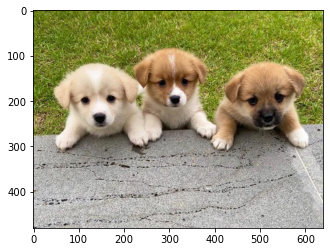

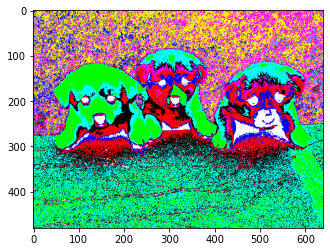

In [9]:
plt.imshow(img.astype('uint8'))
plt.show()
result = colormask(img.shape, mask, k)
plt.imshow(result)
plt.show()


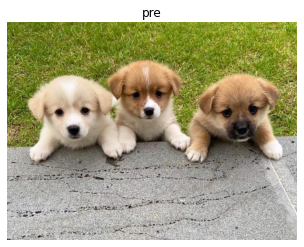

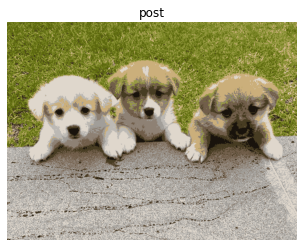

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import copy


def solution3(image):
    h,w,_ = image.shape
    data = image.reshape(-1,3)


    K=15
    over_cnt=0
    centroid=np.random.randint(0,255,size=(K,3)) ## center
    while over_cnt<10000:
        cluster=np.zeros((h*w,1))
        out=np.zeros((h*w,K))

        
        pre_centroid = copy.deepcopy(centroid)
        
        for k in range(K): 
            distance=np.sqrt((data-centroid[k,:])**2).sum(axis=1)
            out[:,k] = distance

        cluster=np.argmin(out,axis=1)


        for k1 in np.unique(cluster): 
            centroid[k1,:]=np.sum(data[cluster==k1,:],axis=0)/np.sum([cluster==k1])
        if np.equal(pre_centroid, centroid).all():
            break
        over_cnt+=1
        
    cluster=np.reshape(cluster,(h,w))
    out=np.zeros(image.shape)
    for i in range(h):
        for j in range(w):
            out[i,j,0]=centroid[cluster[i,j],0]
            out[i,j,1]=centroid[cluster[i,j],1]
            out[i,j,2]=centroid[cluster[i,j],2]
    
    return out.astype('uint8')

image=cv2.imread('test.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.title('pre')
plt.show()

out = solution3(image)
plt.imshow(out)
plt.axis('off')
plt.title('post')
plt.show()

In [25]:
a = np.array([[1,2,3,4],[5,6,7,8]])
np.argmin(a,axis=0)

array([0, 0, 0, 0], dtype=int64)

In [27]:
a = np.array([1,2,3,4,5,6,1,2,3])
np.unique(a)

array([1, 2, 3, 4, 5, 6])